# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
warnings.filterwarnings("ignore")

C:\Users\Utkarsh Sri\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('E:\\Machine Learning\\Dataset\\train_data.csv')
resource_data = pd.read_csv('E:\\Machine Learning\\Dataset\\resources.csv')

In [3]:

print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)
project_data.project_is_approved.value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 Preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 Preprocessing of `Project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)


I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

\"Creativity is intelligence having fun.\" --Albert Einstein. Our elementary library at Greenville Elementary is anything but a quiet, hushed space. It is a place for collaboration and research. It is a place for incorporating technology. It is a place for innovation. And it is a place for creating.Our school serves 350 third and fourth graders who primarily live in rural and poverty-stricken areas in our community. Being a Title I school, approximately 85% of them receive free or reduced lunch. But they are inquisitive, creative, and eager to learn. They love visiting the library to check out books, hear \r\nstories, create digital stories, and use the computer lab for learning and fun. We want to build our library is Makerspace with activities revolving around art and literacy to provide more engaging, hands-on activities.We want to begin \"Makerspace Fridays!\" Our school recently received a $1000 grant for books for our arts-integrated Makerspace. We have received titles such as \"

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 Creativity is intelligence having fun.  --Albert Einstein. Our elementary library at Greenville Elementary is anything but a quiet, hushed space. It is a place for collaboration and research. It is a place for incorporating technology. It is a place for innovation. And it is a place for creating.Our school serves 350 third and fourth graders who primarily live in rural and poverty-stricken areas in our community. Being a Title I school, approximately 85% of them receive free or reduced lunch. But they are inquisitive, creative, and eager to learn. They love visiting the library to check out books, hear   stories, create digital stories, and use the computer lab for learning and fun. We want to build our library is Makerspace with activities revolving around art and literacy to provide more engaging, hands-on activities.We want to begin  Makerspace Fridays!  Our school recently received a $1000 grant for books for our arts-integrated Makerspace. We have received titles such as  Origami

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 Creativity is intelligence having fun Albert Einstein Our elementary library at Greenville Elementary is anything but a quiet hushed space It is a place for collaboration and research It is a place for incorporating technology It is a place for innovation And it is a place for creating Our school serves 350 third and fourth graders who primarily live in rural and poverty stricken areas in our community Being a Title I school approximately 85 of them receive free or reduced lunch But they are inquisitive creative and eager to learn They love visiting the library to check out books hear stories create digital stories and use the computer lab for learning and fun We want to build our library is Makerspace with activities revolving around art and literacy to provide more engaging hands on activities We want to begin Makerspace Fridays Our school recently received a 1000 grant for books for our arts integrated Makerspace We have received titles such as Origami for Everyone How to Make Stuf

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:15<00:00, 1453.92it/s]


In [17]:
# after preprocesing
print(preprocessed_essays[2000])
project_data['preprocessed_essays']=preprocessed_essays

creativity intelligence fun albert einstein elementary library greenville elementary anything quiet hushed space place collaboration research place incorporating technology place innovation place creating school serves 350 third fourth graders primarily live rural poverty stricken areas community title school approximately 85 receive free reduced lunch inquisitive creative eager learn love visiting library check books hear stories create digital stories use computer lab learning fun want build library makerspace activities revolving around art literacy provide engaging hands activities want begin makerspace fridays school recently received 1000 grant books arts integrated makerspace received titles origami everyone make stuff ducktape cool engineering activities girls need supplies correlate new informational texts adding art craft supplies students able design create masterpieces related coursework example studying native americans students use looms yarn recreate navajo pueblo weavin

### 1.4.1 Converting Essay to Number of Words

In [22]:
project_data['totalwords_essay'] = project_data['preprocessed_essays'].str.split().str.len()

<h2><font color='red'> 1.5 Preprocessing of `project_title`</font></h2>

In [23]:
# Combining all the above statemennts 
#from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 34312.32it/s]


In [24]:
print(preprocessed_project_title[2000])
print("="*50)
project_data['preprocessed_project_title']=preprocessed_project_title
project_data.head(5)

empowering students art makerspace


Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   
51140           CA 2016-04-27 00:46:53          Grades PreK-2   
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2        ...         \
55660  My students come from a variety of backgrounds...        ...          
76127  Most of my students have autism, anxiety, anot...        ...          
51140  I have a class of twenty-four kindergarten stu...        ...          
473    I teach at a low-income (Title 1) school. Ever...        ...          
41558  We are an urban, public k-5 elementary school....        ...          

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

      teacher_number_of_previously_posted_projects project_is_approved  \
55660                                           53                   1   
76127                                            4                   1   
51140                                           10                   1   
473                                              2                   1   
41558                                            2                   1   

        clean_categories                 clean_subcategories  \
55660       Math_Science  AppliedSciences Health_LifeScience   
76127       SpecialNeeds                        SpecialNeeds   
51140  Literacy_Language                            Literacy   
473      AppliedLearning                    EarlyDevelopment   
41558  Literacy_Language                            Literacy   

                                                   essay  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                     preprocessed_essays totalwords_essay  \
55660  fortunate enough use fairy tale stem kits clas...              156   
76127  imagine 8 9 years old third grade classroom se...              159   
51140  class 24 students comes diverse learners stude...              106   
473    recently read article giving students choice l...              114   
41558  students crave challenge

### 1.5.1 Converting Title to Number of Words

In [25]:
project_data['totalwords_title'] = project_data['preprocessed_project_title'].str.split().str.len()


## 1.6 Preprocessing Grades

In [26]:
#Preprocessing grades i.e removing all the spaces from the grades and replace - by _



pre_grades = []

for grade in tqdm(project_data['project_grade_category'].values):
    sent = re.sub('[^A-Za-z0-9]+', '_', grade)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    pre_grades.append(sent.lower().strip())
    
    
project_data['grade_category']=pre_grades


100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 169501.68it/s]


## 1.7 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'totalwords_essay', 'preprocessed_project_title',
       'totalwords_title', 'grade_category'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 1.8 Using Pretrained Models: Avg W2V

In [46]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('E:\Machine Learning\glove.42B.300d.txt')



Loading Glove Model


1917495it [08:44, 3657.81it/s]


Done. 1917495  words loaded!


In [47]:


words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)



all the words in the coupus 15568853
the unique words in the coupus 59501
The number of words that are present in both glove vectors and our coupus 51613 ( 86.743 %)
word 2 vec length 51613


In [48]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [139]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Utkarsh
[nltk_data]     Sri\AppData\Roaming\nltk_data...


True

## 1.9 Calculating Sentiment score(Taking Compound in Consideration) 

In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

print(ss['compound'])

for k in ss:
    print(k)
    #print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

0.9975
neg
neu
pos
compound


In [49]:
#https://programminghistorian.org/en/lessons/sentiment-analysis
#The “neg”, “neu”, and “pos” values describe the fraction of weighted scores that fall into each category. VADER also sums all weighted scores to calculate a “compound” value normalized between -1 and 1
#this value attempts to describe the overall affect of the entire text from strongly negative (-1) to strongly positive (1). 

sscore=[]
sid = SentimentIntensityAnalyzer()

for essay in tqdm(project_data['preprocessed_essays']):
    
    
    for_sentiment = essay
    ss = sid.polarity_scores(for_sentiment)
    sscore.append(ss['neu'])
    
project_data['sscore']=sscore


100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:55<00:00, 464.58it/s]


## 1.10 Combining project_data & resources

In [28]:
#Combining the data from the resources from the project data and resoure file for quantity and price 

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [29]:
#replacing all the nan values from the teacher prefix to blank_space

project_data.teacher_prefix=project_data.teacher_prefix.fillna('')

In [30]:
#Seprating the values of approved projects from the whole data i.e removing the target value from the data
X=project_data

In [31]:
y =X['project_is_approved'].values
X.drop(['project_is_approved'], axis=1, inplace=True)
X.head(5)
y.shape

(109248,)

# Assignment 8: Apply DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>
    

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2 Decision Tree</h1>

## 2.1 Spliting of data

In [32]:
#spliting of data using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)
print(X_train.columns)

(61452, 24) (61452,)
(20484, 24) (20484,)
(27312, 24) (27312,)
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'preprocessed_essays',
       'totalwords_essay', 'preprocessed_project_title', 'totalwords_title',
       'grade_category', 'price', 'quantity'],
      dtype='object')


## 2.2 Vectorizing Numericals Features

### 2.2.1 Price Standarized

In [33]:
from sklearn.preprocessing import StandardScaler
price_scalar = StandardScaler()

price_scalar.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = price_scalar.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm =price_scalar.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = price_scalar.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(61452, 1) (61452,)
(20484, 1) (20484,)
(27312, 1) (27312,)


### 2.2.2 Teacher_number_of_previously_posted_projects standardized

In [34]:
from sklearn.preprocessing import StandardScaler
price_scalar = StandardScaler()

price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_pp_norm = price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_pp_norm =price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_pp_norm = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_pp_norm.shape, y_train.shape)
print(X_cv_pp_norm.shape, y_cv.shape)
print(X_test_pp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(61452, 1) (61452,)
(20484, 1) (20484,)
(27312, 1) (27312,)


### 2.2.3 Quantity Standarized

In [35]:
from sklearn.preprocessing import StandardScaler
price_scalar = StandardScaler()

price_scalar.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = price_scalar.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_norm =price_scalar.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = price_scalar.transform(X_test['quantity'].values.reshape(-1,1))

print(X_train_quantity_norm.shape, y_train.shape)                                           
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

(61452, 1) (61452,)
(20484, 1) (20484,)
(27312, 1) (27312,)


## 2.3 Vectorizing Categorical features

### 2.3.1 Vectorizing School_state

In [36]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

    
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

school_fea=vectorizer.get_feature_names()

After vectorizations
(61452, 51) (61452,)
(20484, 51) (20484,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 2.3.2 Vectorizing teacher_prefix

In [37]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
prefix=vectorizer.get_feature_names()

After vectorizations
(61452, 5) (61452,)
(20484, 5) (20484,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### 2.3.3 Vectorizing grade_category

In [38]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
grade_fea=vectorizer.get_feature_names()

After vectorizations
(61452, 4) (61452,)
(20484, 4) (20484,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 2.3.4 Vectorizing clean_categories

In [39]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_cv_cat_ohe.shape, y_cv.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
clean_fea=vectorizer.get_feature_names()

After vectorizations
(61452, 9) (61452,)
(20484, 9) (20484,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### 2.3.5 Vectorizing clean_subcategories

In [40]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_scat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_scat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_scat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_scat_ohe.shape, y_train.shape)
print(X_cv_scat_ohe.shape, y_cv.shape)
print(X_test_scat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
sub_fea=vectorizer.get_feature_names()

After vectorizations
(61452, 30) (61452,)
(20484, 30) (20484,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## 2.4 Encoding categorical & numerical features

In [41]:
#combining all the numerical and categorical values togeather

from scipy.sparse import hstack
X_tr_com = hstack((X_train_cat_ohe,X_train_scat_ohe,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_pp_norm,X_train_price_norm,X_train_quantity_norm)).tocsr()
X_cr_com = hstack((X_cv_cat_ohe,X_cv_scat_ohe,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_pp_norm,X_cv_price_norm,X_cv_quantity_norm)).tocsr()
X_te_com = hstack((X_test_cat_ohe,X_test_scat_ohe,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_pp_norm,X_test_price_norm,X_test_quantity_norm)).tocsr()

print("Final Data matrix")
print(X_tr_com.shape, y_train.shape)
print(X_cr_com.shape, y_cv.shape)
print(X_te_com.shape, y_test.shape)
print("="*100)
fea=clean_fea+sub_fea+school_fea+prefix+grade_fea+['previously_posted_project','price','quantity']
    
print(len(fea))

Final Data matrix
(61452, 102) (61452,)
(20484, 102) (20484,)
(27312, 102) (27312,)
102


In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    


<h2>2.4 Appling DT on different kind of featurization as mentioned in the instructions</h2>

<br>Apply DT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [43]:

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred
    

### 2.4.1 Applying DT on BOW,<font color='red'> SET 1</font>

##### 2.4.1.1 Converting project_title & essay into BOW 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data


X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

essay_fea=vectorizer.get_feature_names()
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['preprocessed_project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)
title_fea=vectorizer.get_feature_names()

After vectorizations
(61452, 5000) (61452,)
(20484, 5000) (20484,)
(27312, 5000) (27312,)
After vectorizations
(61452, 5000) (61452,)
(20484, 5000) (20484,)
(27312, 5000) (27312,)


##### 2.4.1.2 Encoding numerical,categorical & BOW 

In [45]:

from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_title_bow,X_tr_com)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow, X_cv_title_bow,X_cr_com)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_title_bow,X_te_com)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)
feat=essay_fea+title_fea+fea
len(feat)

Final Data matrix
(61452, 10102) (61452,)
(20484, 10102) (20484,)
(27312, 10102) (27312,)


10102

##### 2.4.1.3 Applying DT

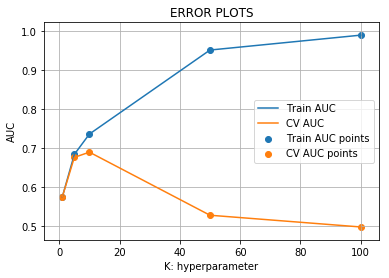

In [46]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

train_auc = []
cv_auc = []

max_depth=[1,5,10,50,100]
for i in max_depth:
    
        clf= DecisionTreeClassifier(max_depth=i)
        clf.fit(X_tr_bow, y_train)
        
        y_train_pred = batch_predict(clf, X_tr_bow)    
        y_cv_pred = batch_predict(clf, X_cr_bow)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
        


plt.plot(max_depth, train_auc,  label='Train AUC')
plt.plot(max_depth, cv_auc,  label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

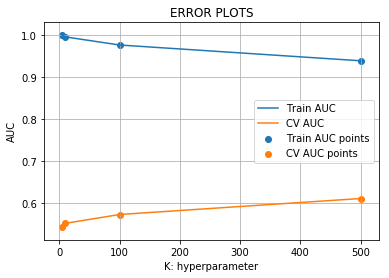

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

train_auc = []
cv_auc = []
min_split=[5,10,100,500]
for i in min_split:

        clf= DecisionTreeClassifier(min_samples_split=i)
        clf.fit(X_tr_bow, y_train)
        
        y_train_pred = batch_predict(clf, X_tr_bow)    
        y_cv_pred = batch_predict(clf, X_cr_bow)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
        
plt.plot(min_split, train_auc,  label='Train AUC')
plt.plot(min_split, cv_auc,  label='CV AUC')

plt.scatter(min_split, train_auc, label='Train AUC points')
plt.scatter(min_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

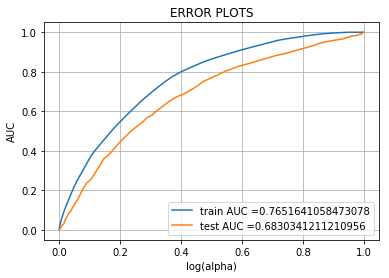

In [43]:

from sklearn.metrics import roc_curve, auc


clf=DecisionTreeClassifier(max_depth=15,min_samples_split=100)

clf.fit(X_tr_bow, y_train)


y_train_pred =batch_predict(clf,X_tr_bow)    
y_test_pred = batch_predict(clf,X_te_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [72]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2497243079691429 for threshold 0.727


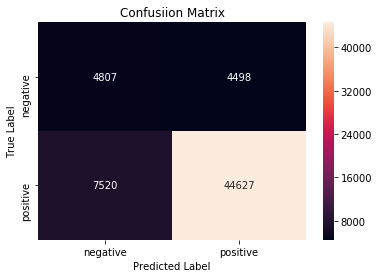

In [46]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn

print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cmtr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmtr, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24982628313757718 for threshold 0.814


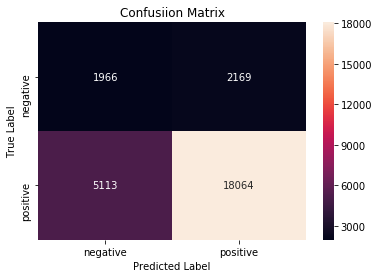

In [47]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn

# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
print("Test confusion matrix")

cmt=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [140]:
#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
y_test_pre = clf.predict(X_te_bow)
fp_phrases =list(X_test['preprocessed_essays'])
price_t= list(X_test['price'])
teach= list(X_test['teacher_number_of_previously_posted_projects'])
fp_words = []
fp_price=[]
fp_teacher=[]
for i in  range(len(y_test_pre)):
    if y_test_pre[i]==1 and y_test[i]!=y_test_pre[i]:
        fp_words.append(neg_phrases[i])
        fp_price.append(price_t[i])
        fp_teacher.append(teach[i])

In [141]:
fp_text = pd.Series(neg_words).str.cat(sep=' ')
fp_text[:100]


'work low socio economic area students come us variety needs pertaining supplies food shelter love cl'

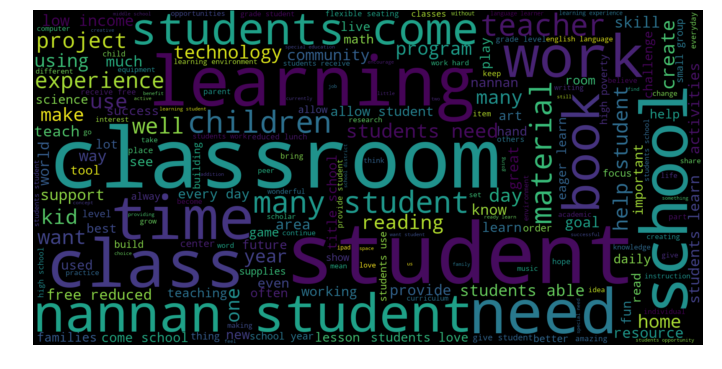

In [142]:
#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(fp_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


PDF Values 
[9.47792208e-01 3.22077922e-02 1.06493506e-02 4.41558442e-03
 2.85714286e-03 1.81818182e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.59740260e-04]
Bin Edges 
[  0.   32.2  64.4  96.6 128.8 161.  193.2 225.4 257.6 289.8 322. ]


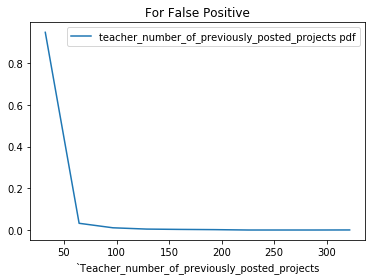

----------------------------------------------------------


In [143]:
counts,bin_edges=np.histogram(fp_teacher,bins=10,density=True)
pdf=counts/sum(counts)
print("PDF Values ")
print(pdf)
print("Bin Edges ")
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="teacher_number_of_previously_posted_projects pdf")
plt.legend()
plt.title("For False Positive")
plt.xlabel("`Teacher_number_of_previously_posted_projects")
plt.show() 
print("----------------------------------------------------------")


No handles with labels found to put in legend.


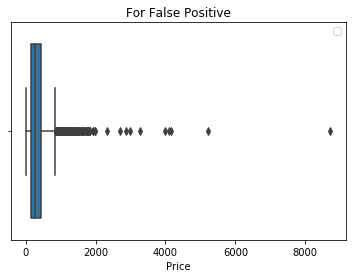

In [162]:
sns.boxplot(fp_price)
plt.legend()
plt.title("For False Positive")
plt.xlabel("Price")
plt.show()


In [79]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


In [93]:
from sklearn import tree
clff=tree.DecisionTreeClassifier(max_depth=3)

clff.fit(X_tr_bow, y_train)

import graphviz 
dot_data = tree.export_graphviz(clff, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clff, out_file=None,feature_names=feat,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename='D:\graph.dot') 


'D:\\graph.dot.pdf'

### 2.4.2 Applying DT  on TFIDF,<font color='red'> SET 2</font>

##### 2.4.2.1Converting Project_title & essay into tf-idf

In [50]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['preprocessed_project_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations
(61452, 5000) (61452,)
(20484, 5000) (20484,)
(27312, 5000) (27312,)
After vectorizations
(61452, 5000) (61452,)
(20484, 5000) (20484,)
(27312, 5000) (27312,)


##### 2.4.2.2 Encoding numerical,categorical & Tf-idf 

In [51]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_title_tfidf,X_tr_com)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_title_tfidf,X_cr_com)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_title_tfidf,X_te_com)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(61452, 10102) (61452,)
(20484, 10102) (20484,)
(27312, 10102) (27312,)


##### 2.4.2.3 Applying DT

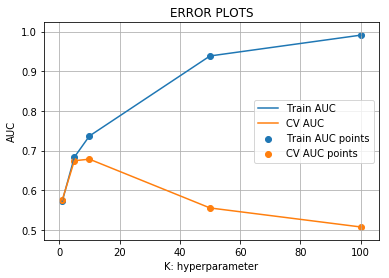

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

train_auc = []
cv_auc = []
max_depth=[1,5,10,50,100]
for i in max_depth:
    
        clf= DecisionTreeClassifier(max_depth=i)
        clf.fit(X_tr_tfidf, y_train)
        
        y_train_pred = batch_predict(clf, X_tr_tfidf)    
        y_cv_pred = batch_predict(clf, X_cr_tfidf)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
        


plt.plot(max_depth, train_auc,  label='Train AUC')
plt.plot(max_depth, cv_auc,  label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

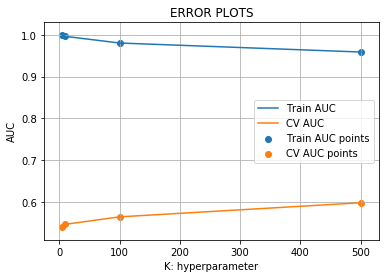

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

train_auc = []
cv_auc = []
min_split=[5,10,100,500]
for i in min_split:

        clf= DecisionTreeClassifier(min_samples_split=i)
        clf.fit(X_tr_tfidf, y_train)
        
        y_train_pred = batch_predict(clf, X_tr_tfidf)    
        y_cv_pred = batch_predict(clf, X_cr_tfidf)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
        
plt.plot(min_split, train_auc,  label='Train AUC')
plt.plot(min_split, cv_auc,  label='CV AUC')

plt.scatter(min_split, train_auc, label='Train AUC points')
plt.scatter(min_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

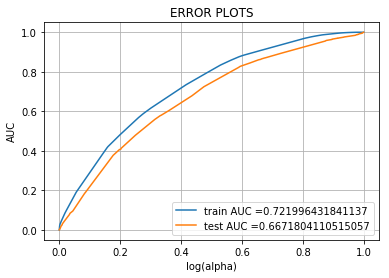

In [52]:
from sklearn.metrics import roc_curve, auc


clf=DecisionTreeClassifier(max_depth=10,min_samples_split=100)

clf.fit(X_tr_tfidf, y_train)


y_train_pred =batch_predict(clf,X_tr_tfidf)    
y_test_pred = batch_predict(clf,X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999061883088516 for threshold 0.821


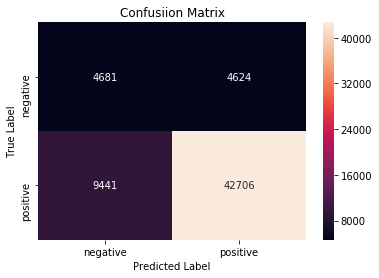

In [95]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
#print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
cmtr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmtr, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24956764962269307 for threshold 0.826


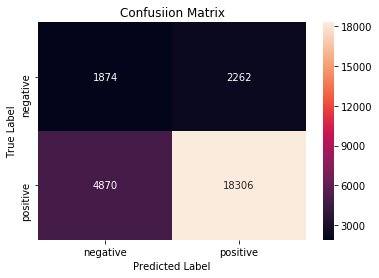

In [96]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
print("Test confusion matrix")
cmt=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 2.4.2.4 Word cloud for False Positive points

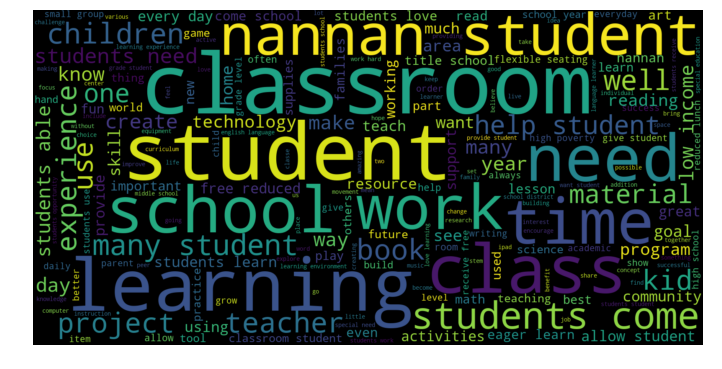

In [97]:
#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
y_test_pre = clf.predict(X_te_tfidf)
fp_phrases =list(X_test['preprocessed_essays'])
price_t= list(X_test['price'])
teach= list(X_test['teacher_number_of_previously_posted_projects'])
fp_words = []
fp_price=[]
fp_teacher=[]
for i in  range(len(y_test_pre)):
    if y_test_pre[i]==1 and y_test[i]!=y_test_pre[i]:
        fp_words.append(fp_phrases[i])
        fp_price.append(price_t[i])
        fp_teacher.append(teach[i])
        
        
fp_text = pd.Series(fp_words).str.cat(sep=' ')
fp_text[:100]

#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(fp_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



#### 2.4.2.5 Pdf Values for 'teacher_number_of_previously_posted_projects pdf' 

PDF Values 
[9.55639098e-01 2.60651629e-02 7.51879699e-03 7.26817043e-03
 1.75438596e-03 7.51879699e-04 2.50626566e-04 2.50626566e-04
 0.00000000e+00 5.01253133e-04]
Bin Edges 
[  0.   34.3  68.6 102.9 137.2 171.5 205.8 240.1 274.4 308.7 343. ]


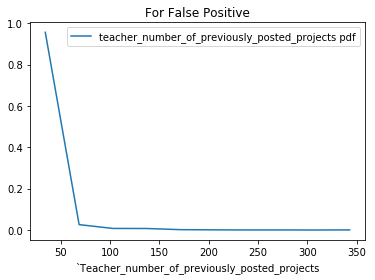

----------------------------------------------------------


In [98]:
counts,bin_edges=np.histogram(fp_teacher,bins=10,density=True)
pdf=counts/sum(counts)
print("PDF Values ")
print(pdf)
print("Bin Edges ")
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="teacher_number_of_previously_posted_projects pdf")
plt.legend()
plt.title("For False Positive")
plt.xlabel("`Teacher_number_of_previously_posted_projects")
plt.show() 
print("----------------------------------------------------------")


#### 2.4.2.6 Box-plot for 'Price'

No handles with labels found to put in legend.


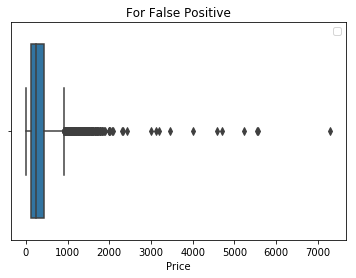

In [99]:
sns.boxplot(fp_price)
plt.legend()
plt.title("For False Positive")
plt.xlabel("Price")
plt.show()


#### 2.4.2.7 Tree Representation

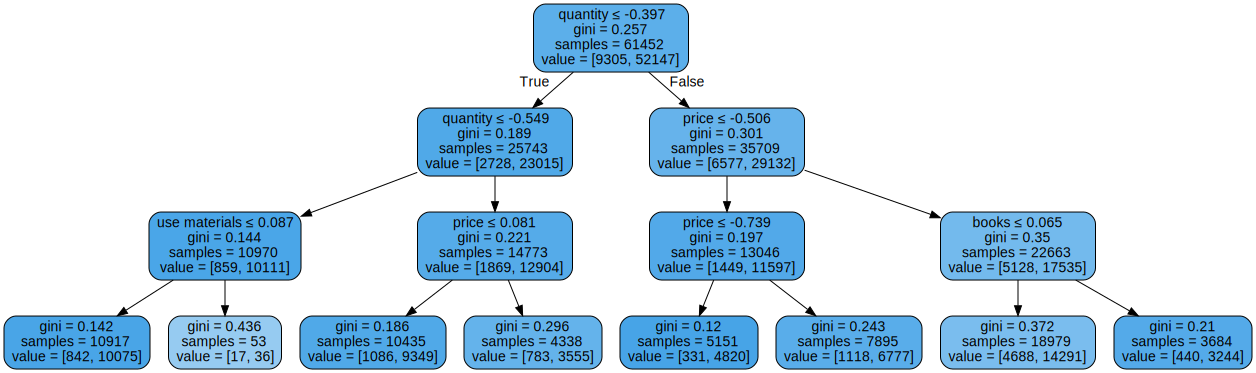

In [81]:
clff=tree.DecisionTreeClassifier(max_depth=3)

clff.fit(X_tr_tfidf, y_train)

import graphviz 
dot_data = tree.export_graphviz(clff, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clff, out_file=None,feature_names=feat,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 2.4.3 Applying DT  on AVG W2V,<font color='red'> SET 3</font>

##### 2.4.3.1 Converting Project_essay to Avg W2V 

In [49]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_essay.append(vector)

print(len(avg_w2v_vectors_train_essay))
print(len(avg_w2v_vectors_train_essay[0]))


avg_w2v_vectors_cv_essay = []; 
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_essay.append(vector)

print(len(avg_w2v_vectors_cv_essay))
print(len(avg_w2v_vectors_cv_essay[0]))

avg_w2v_vectors_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_essay.append(vector)

print(len(avg_w2v_vectors_test_essay))
print(len(avg_w2v_vectors_test_essay[0]))

100%|██████████████████████████████████████████████████████████████████████████| 61452/61452 [00:58<00:00, 1046.21it/s]


61452
300


100%|██████████████████████████████████████████████████████████████████████████| 20484/20484 [00:10<00:00, 2027.85it/s]


20484
300


100%|██████████████████████████████████████████████████████████████████████████| 27312/27312 [00:13<00:00, 2020.01it/s]


27312
300


##### 2.4.3.2 Converting project_title to Avg W2V

In [50]:
avg_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_title.append(vector)

print(len(avg_w2v_vectors_train_title))
print(len(avg_w2v_vectors_train_title[0]))


avg_w2v_vectors_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_title.append(vector)

print(len(avg_w2v_vectors_cv_title))
print(len(avg_w2v_vectors_cv_title[0]))

avg_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_title.append(vector)

print(len(avg_w2v_vectors_test_title))
print(len(avg_w2v_vectors_test_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 61452/61452 [00:01<00:00, 36823.77it/s]


61452
300


100%|█████████████████████████████████████████████████████████████████████████| 20484/20484 [00:00<00:00, 30074.28it/s]


20484
300


100%|█████████████████████████████████████████████████████████████████████████| 27312/27312 [00:00<00:00, 39420.20it/s]


27312
300


##### 2.4.3.3 Combing numerical,categorical & Avg W2V

In [51]:
from scipy.sparse import hstack
X_tr_w2v = hstack((avg_w2v_vectors_train_essay ,avg_w2v_vectors_train_title, X_tr_com)).tocsr()
X_cr_w2v = hstack((avg_w2v_vectors_cv_essay, avg_w2v_vectors_cv_title,X_cr_com)).tocsr()
X_te_w2v = hstack((avg_w2v_vectors_test_essay, avg_w2v_vectors_test_title,X_te_com)).tocsr()

print("Final Data matrix")
print(X_tr_w2v.shape, y_train.shape)
print(X_cr_w2v.shape, y_cv.shape)
print(X_te_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(61452, 702) (61452,)
(20484, 702) (20484,)
(27312, 702) (27312,)


##### 2.4.3.4 Applying DT

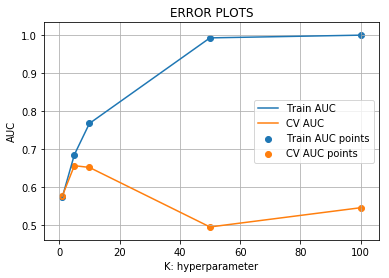

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

train_auc = []
cv_auc = []
neww=[]
max_depth=[1,5,10,50,100]
for i in max_depth:
    
        clf= DecisionTreeClassifier(max_depth=i)
        clf.fit(X_tr_w2v, y_train)
        
        y_train_pred_w2v = batch_predict(clf, X_tr_w2v)    
        y_cv_pred_w2v = batch_predict(clf, X_cr_w2v)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred_w2v))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred_w2v))
    
        


plt.plot(max_depth, train_auc,  label='Train AUC')
plt.plot(max_depth, cv_auc,  label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

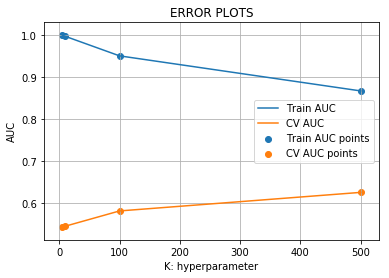

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier


train_auc = []
cv_auc = []
min_split=[5,10,100,500]
for i in min_split:

        clf= DecisionTreeClassifier(min_samples_split=i)
        clf.fit(X_tr_w2v, y_train)
        
        y_train_pred_w2v = batch_predict(clf, X_tr_w2v)    
        y_cv_pred_w2v = batch_predict(clf, X_cr_w2v)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred_w2v))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred_w2v))
        
plt.plot(min_split, train_auc,  label='Train AUC')
plt.plot(min_split, cv_auc,  label='CV AUC')

plt.scatter(min_split, train_auc, label='Train AUC points')
plt.scatter(min_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

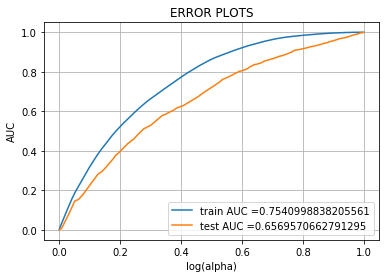

In [54]:
from sklearn.metrics import roc_curve, auc


clf=DecisionTreeClassifier(max_depth=15,min_samples_split=100)

clf.fit(X_tr_w2v, y_train)


y_train_pred =batch_predict(clf,X_tr_w2v)    
y_test_pred = batch_predict(clf,X_te_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999646293254363 for threshold 0.802


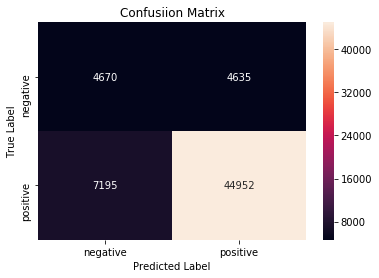

In [57]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
print("="*100)
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")


cmtr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmtr, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24988682661837935 for threshold 0.858


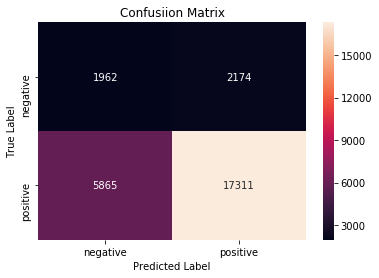

In [58]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
import seaborn as sns
print("Test confusion matrix")

cmt=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 2.4.3.5  Wordcloud for 'False Positive' values

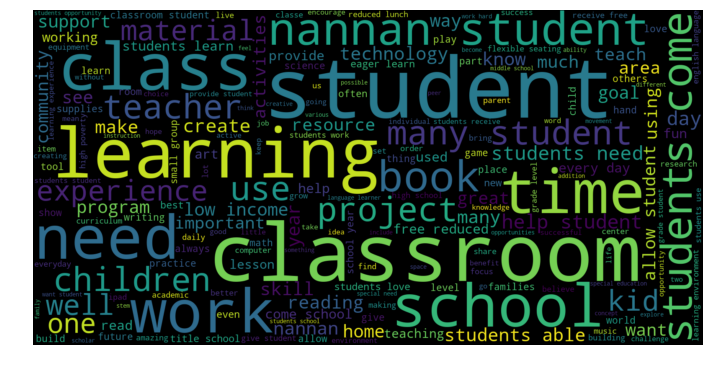

In [61]:
#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
y_test_pre = clf.predict(X_te_w2v)
fp_phrases =list(X_test['preprocessed_essays'])
price_t= list(X_test['price'])
teach= list(X_test['teacher_number_of_previously_posted_projects'])
fp_words = []
fp_price=[]
fp_teacher=[]
for i in  range(len(y_test_pre)):
    if y_test_pre[i]==1 and y_test[i]!=y_test_pre[i]:
        fp_words.append(fp_phrases[i])
        fp_price.append(price_t[i])
        fp_teacher.append(teach[i])
        
        
fp_text = pd.Series(fp_words).str.cat(sep=' ')
fp_text[:100]

#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(fp_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



#### 2.4.3.6 PDF values For 'Teacher number of previously posted projects'

PDF Values 
[9.52058505e-01 2.78981582e-02 8.12567714e-03 7.85482124e-03
 1.89599133e-03 1.08342362e-03 2.70855905e-04 2.70855905e-04
 0.00000000e+00 5.41711809e-04]
Bin Edges 
[  0.   34.3  68.6 102.9 137.2 171.5 205.8 240.1 274.4 308.7 343. ]


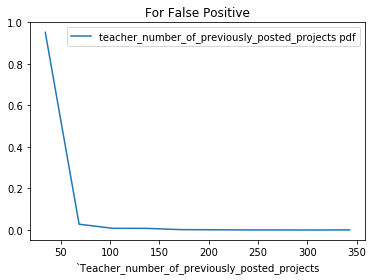

----------------------------------------------------------


In [62]:
counts,bin_edges=np.histogram(fp_teacher,bins=10,density=True)
pdf=counts/sum(counts)
print("PDF Values ")
print(pdf)
print("Bin Edges ")
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="teacher_number_of_previously_posted_projects pdf")
plt.legend()
plt.title("For False Positive")
plt.xlabel("`Teacher_number_of_previously_posted_projects")
plt.show() 
print("----------------------------------------------------------")


#### 2.4.3.6 Box-plot values For 'Price'

No handles with labels found to put in legend.


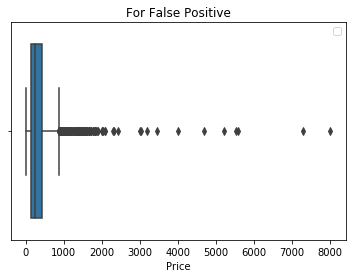

In [63]:
sns.boxplot(fp_price)
plt.legend()
plt.title("For False Positive")
plt.xlabel("Price")
plt.show()


### 2.4.4 Applying DT  on TFIDF W2V,<font color='red'> SET 4</font>

##### 2.4.4.1 Converting project_essay to TF-idf W2V

In [64]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay.append(vector)

print(len(tfidf_w2v_vectors_essay))
print(len(tfidf_w2v_vectors_essay[0]))

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_vectors_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_cv.append(vector)

print(len(tfidf_w2v_vectors_essay_cv))
print(len(tfidf_w2v_vectors_essay_cv[0]))


tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_vectors_essay_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_te.append(vector)

print(len(tfidf_w2v_vectors_essay_te))
print(len(tfidf_w2v_vectors_essay_te[0]))

100%|███████████████████████████████████████████████████████████████████████████| 61452/61452 [02:39<00:00, 384.87it/s]


61452
300


100%|███████████████████████████████████████████████████████████████████████████| 61452/61452 [02:58<00:00, 344.30it/s]


61452
300


100%|███████████████████████████████████████████████████████████████████████████| 61452/61452 [02:48<00:00, 365.13it/s]


61452
300


##### 2.4.4.2 Converting project_title to TF-idf W2V

In [65]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay.append(vector)

print(len(tfidf_w2v_vectors_essay))
print(len(tfidf_w2v_vectors_essay[0]))

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_vectors_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_cv.append(vector)

print(len(tfidf_w2v_vectors_essay_cv))
print(len(tfidf_w2v_vectors_essay_cv[0]))


tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_vectors_essay_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_te.append(vector)

print(len(tfidf_w2v_vectors_essay_te))
print(len(tfidf_w2v_vectors_essay_te[0]))

100%|███████████████████████████████████████████████████████████████████████████| 61452/61452 [02:45<00:00, 370.49it/s]


61452
300


100%|███████████████████████████████████████████████████████████████████████████| 61452/61452 [02:43<00:00, 376.67it/s]


61452
300


100%|███████████████████████████████████████████████████████████████████████████| 61452/61452 [02:44<00:00, 373.45it/s]


61452
300


##### 2.4.4.3 Combing numerical,categorical features & tf-idf W2V

In [66]:
from scipy.sparse import hstack
X_tr_w2v_tfidf = hstack((avg_w2v_vectors_train_essay ,avg_w2v_vectors_train_title, X_tr_com)).tocsr()
X_cr_w2v_tfidf = hstack((avg_w2v_vectors_cv_essay, avg_w2v_vectors_cv_title,X_cr_com)).tocsr()
X_te_w2v_tfidf = hstack((avg_w2v_vectors_test_essay, avg_w2v_vectors_test_title,X_te_com)).tocsr()

print("Final Data matrix")
print(X_tr_w2v_tfidf.shape, y_train.shape)
print(X_cr_w2v_tfidf.shape, y_cv.shape)
print(X_te_w2v_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(61452, 702) (61452,)
(20484, 702) (20484,)
(27312, 702) (27312,)


##### 2.4.4.4 Applying DT

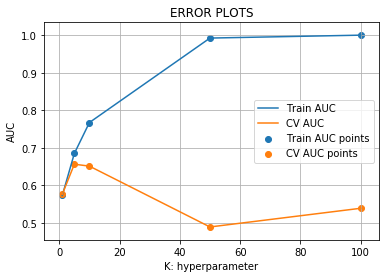

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

train_auc = []
cv_auc = []
neww=[]
max_depth=[1,5,10,50,100]
for i in max_depth:
    
        clf= DecisionTreeClassifier(max_depth=i)
        clf.fit(X_tr_w2v_tfidf, y_train)
        
        y_train_pred = batch_predict(clf, X_tr_w2v_tfidf)    
        y_cv_pred = batch_predict(clf, X_cr_w2v_tfidf)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
        


plt.plot(max_depth, train_auc,  label='Train AUC')
plt.plot(max_depth, cv_auc,  label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

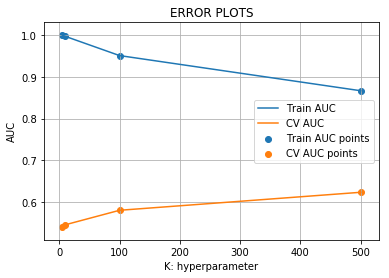

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier


train_auc = []
cv_auc = []
min_split=[5,10,100,500]
for i in min_split:

        clf= DecisionTreeClassifier(min_samples_split=i)
        clf.fit(X_tr_w2v_tfidf, y_train)
        
        y_train_pred_w2v = batch_predict(clf, X_tr_w2v_tfidf)    
        y_cv_pred_w2v = batch_predict(clf, X_cr_w2v_tfidf)
        
        train_auc.append(roc_auc_score(y_train,y_train_pred_w2v))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred_w2v))
        
plt.plot(min_split, train_auc,  label='Train AUC')
plt.plot(min_split, cv_auc,  label='CV AUC')

plt.scatter(min_split, train_auc, label='Train AUC points')
plt.scatter(min_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

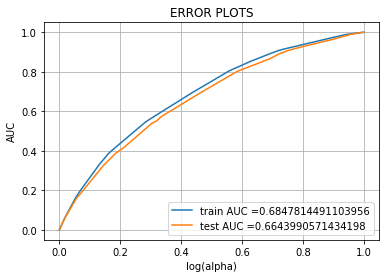

In [69]:
from sklearn.metrics import roc_curve, auc


clf=DecisionTreeClassifier(max_depth=5,min_samples_split=100)

clf.fit(X_tr_w2v_tfidf, y_train)


y_train_pred =batch_predict(clf,X_tr_w2v_tfidf)    
y_test_pred = batch_predict(clf,X_te_w2v_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24658833530013533 for threshold 0.835


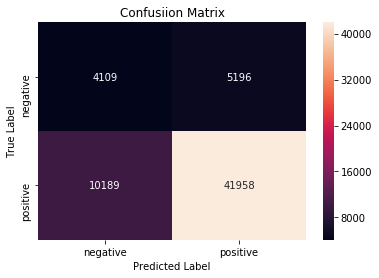

In [70]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")


cmtr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmtr, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24836968365701542 for threshold 0.843


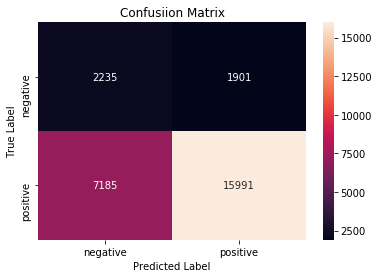

In [71]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
print("="*100)
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")


cmt=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 2.4.4.5  Wordcloud for 'False Positive' values

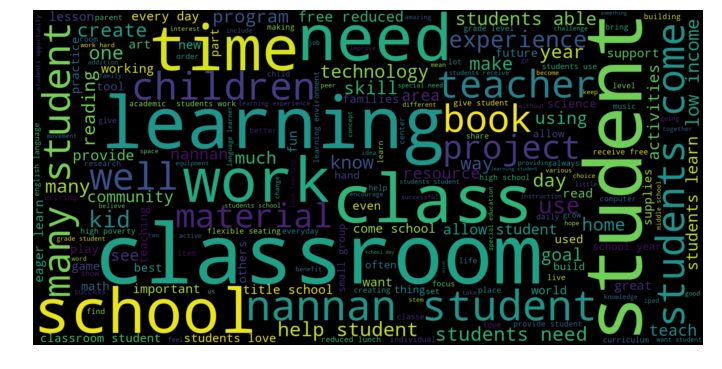

In [72]:
#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
y_test_pre = clf.predict(X_te_w2v_tfidf)
fp_phrases =list(X_test['preprocessed_essays'])
price_t= list(X_test['price'])
teach= list(X_test['teacher_number_of_previously_posted_projects'])
fp_words = []
fp_price=[]
fp_teacher=[]
for i in  range(len(y_test_pre)):
    if y_test_pre[i]==1 and y_test[i]!=y_test_pre[i]:
        fp_words.append(fp_phrases[i])
        fp_price.append(price_t[i])
        fp_teacher.append(teach[i])
        
        
fp_text = pd.Series(fp_words).str.cat(sep=' ')
fp_text[:100]

#https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(fp_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 2.4.4.6 PDF value for 'Teacher number of previously posted project'

PDF Values 
[9.55974843e-01 2.58829221e-02 7.49879052e-03 7.01499758e-03
 1.69327528e-03 9.67585873e-04 2.41896468e-04 2.41896468e-04
 0.00000000e+00 4.83792937e-04]
Bin Edges 
[  0.   34.3  68.6 102.9 137.2 171.5 205.8 240.1 274.4 308.7 343. ]


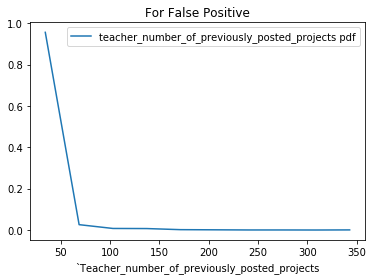

----------------------------------------------------------


In [73]:
counts,bin_edges=np.histogram(fp_teacher,bins=10,density=True)
pdf=counts/sum(counts)
print("PDF Values ")
print(pdf)
print("Bin Edges ")
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="teacher_number_of_previously_posted_projects pdf")
plt.legend()
plt.title("For False Positive")
plt.xlabel("`Teacher_number_of_previously_posted_projects")
plt.show() 
print("----------------------------------------------------------")


#### 2.4.4.7  Box-Plot for 'Price' 

No handles with labels found to put in legend.


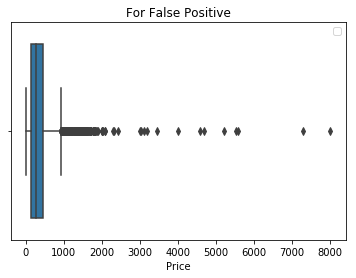

In [74]:
sns.boxplot(fp_price)
plt.legend()
plt.title("For False Positive")
plt.xlabel("Price")
plt.show()

<h2>2.5 Logistic regression with added Features `Set 5` </h2>

##### 2.5.1 Selecting top 5000 Features from set 2

In [59]:
#https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn
def selectKImportance(model, X, k=5):
     return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [67]:
newX_tr = selectKImportance(clf,X_tr_tfidf,5000)
newX_cv = selectKImportance(clf,X_cr_tfidf,5000)
newX_te = selectKImportance(clf,X_te_tfidf,5000)
print(newX_tr.shape)
print(newX_cv.shape)
print(newX_te.shape)

(61452, 5000)
(20484, 5000)
(27312, 5000)


##### 2.5.2 Applying Logistic Regression

[-11.512925464970229, -9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184, 11.512925464970229]


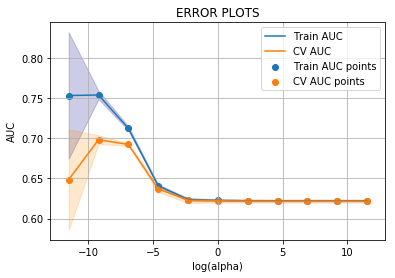

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from math import log
from sklearn.model_selection import GridSearchCV

neigh=linear_model.SGDClassifier(loss='log')
parameters = {'alpha':[10**-5,10**-4,10**-3,10**-2,10**-1,1,10,100,1000,10000,100000]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(newX_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

parameter=[log(y) for y in parameters['alpha']]


print(parameter)
plt.plot((parameter), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameter,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameter, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameter,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameter, train_auc, label='Train AUC points')
plt.scatter(parameter, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

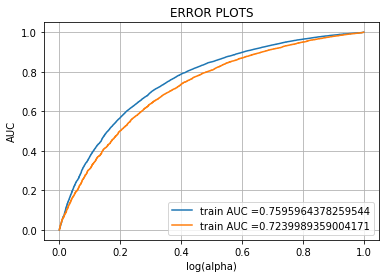

In [70]:
k_5 = 10**-4

from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

clf = linear_model.SGDClassifier(loss='log',alpha=k_5)
neigh=CalibratedClassifierCV(clf,method='sigmoid')
neigh.fit(newX_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, newX_tr)    
y_test_pred = batch_predict(neigh, newX_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249999997112598 for threshold 0.787


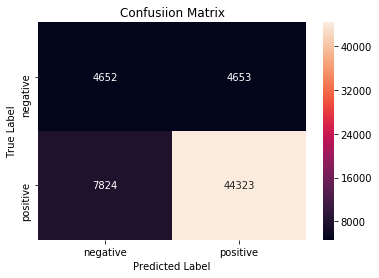

In [73]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
print("Train confusion matrix")

cmt=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998537859927 for threshold 0.867


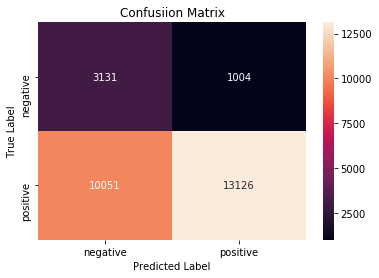

In [74]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
import seaborn as sns
print("Test confusion matrix")

cmt=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cmt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


<h1>3. Conclusions</h1>

In [76]:
#https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-using-knn
models = pd.DataFrame({'Model': ['DT with Bow', "DT with TFIDF", "DT with Avg_w2v", "DT with tfidf_w2v"], 'Deapth': [15,10,15,5], 'Min_sample_split':[100,100,100,100],'Train AUC':[.765,.721,.754,.684] , 'Test AUC': [.683,.667,.656,.664]}, columns = ["Model", "Deapth","Min_sample_split", "Train AUC", "Test AUC"])
models#.sort_values(by='Test AUC', ascending=False)

Model  Deapth  Min_sample_split  Train AUC  Test AUC
0        DT with Bow      15               100      0.765     0.683
1      DT with TFIDF      10               100      0.721     0.667
2    DT with Avg_w2v      15               100      0.754     0.656
3  DT with tfidf_w2v       5               100      0.684     0.664